<a href="https://colab.research.google.com/github/abraham-30/ProjectStockPrediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BBCA/BBCA.JK.csv

In [94]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [95]:
data_stock = pd.read_csv('BBCA.JK.csv')

#DATA VISUALIZATION

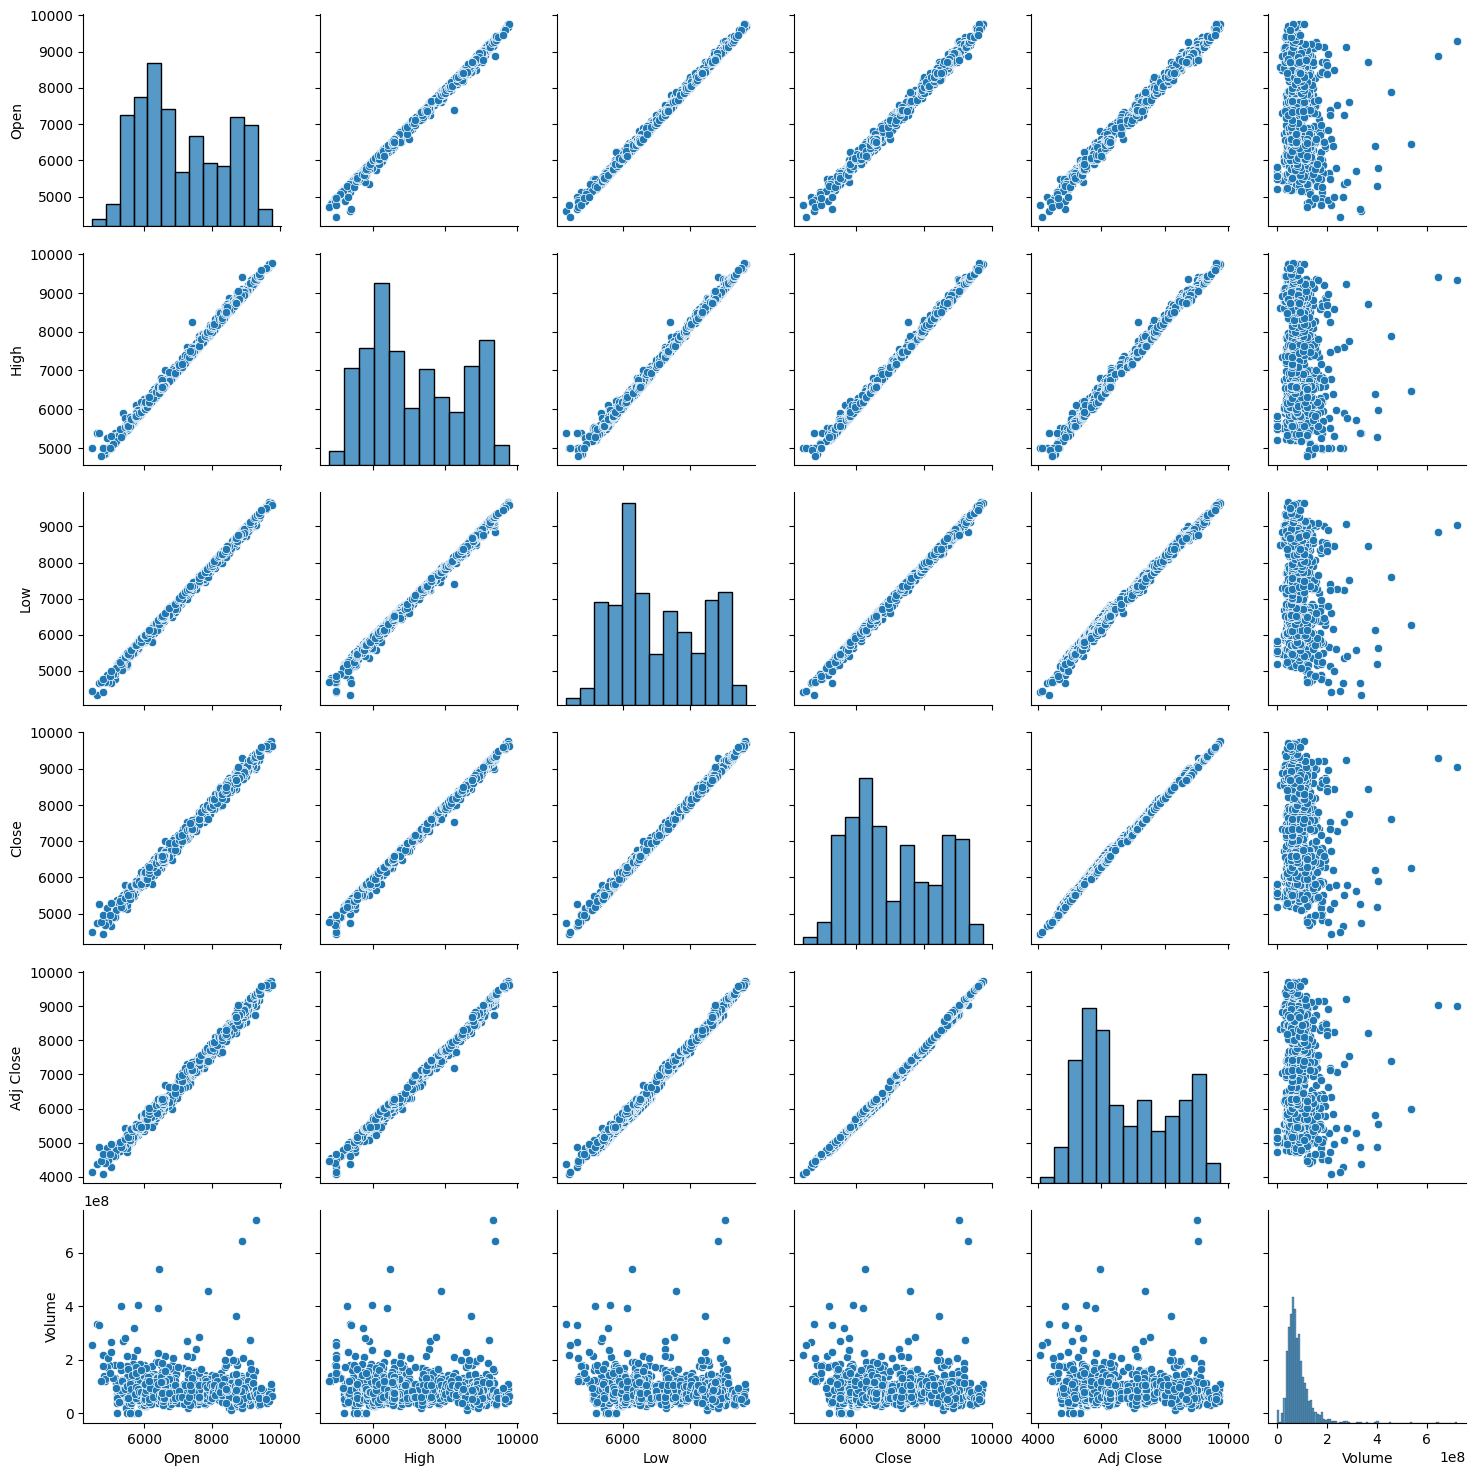

In [96]:
sb.pairplot(data_stock)

##DATA STRUCTURE

In [97]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1248 non-null   object 
 1   Open       1248 non-null   float64
 2   High       1248 non-null   float64
 3   Low        1248 non-null   float64
 4   Close      1248 non-null   float64
 5   Adj Close  1248 non-null   float64
 6   Volume     1248 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.4+ KB


In [98]:
data_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1.248000e+03
mean,7120.729167,7183.040865,7056.037660,7119.370994,6811.075320,8.338129e+07
std,1279.267388,1282.909039,1282.063928,1283.958966,1412.430495,5.415374e+07
min,4450.000000,4800.000000,4325.000000,4430.000000,4084.944580,0.000000e+00
25%,6070.000000,6108.750000,6010.000000,6055.000000,5673.119263,5.346812e+07
50%,6800.000000,6847.500000,6727.500000,6785.000000,6320.439453,7.195560e+07
75%,8325.000000,8450.000000,8250.000000,8325.000000,8123.101562,9.831750e+07
max,9775.000000,9775.000000,9675.000000,9750.000000,9750.000000,7.228279e+08


In [99]:
data_stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1243    False
1244    False
1245    False
1246    False
1247    False
Length: 1248, dtype: bool

#DATA PROCESSING

##Removing Duplicates


In [100]:
data_stock.drop_duplicates(inplace = True)

##Fill NA

In [101]:
data_num = data_stock.select_dtypes(exclude = object)
data_obj = data_stock.select_dtypes(include = object)

for col in data_stock.columns:
  if col in data_num:
    data_stock[col] = data_stock[col].fillna(data_stock[col].mean)
  elif col in data_obj:
    data_stock[col] = data_stock[col].fillna(data_stock[col].mode()[0])

##Encode Object Type

In [102]:
encoder = LabelEncoder()

for col in data_obj:
  data_stock[col] = encoder.fit_transform(data_stock[col])

##Normalize Data

In [103]:
normal_scaler = MinMaxScaler(feature_range = (0,1))
normal_scaled_x = normal_scaler.fit_transform(data_stock)
data_stock = pd.DataFrame(normal_scaled_x, columns=data_stock.columns)

##Delete Outliers

In [104]:
for col in data_stock.columns:
  upper_limit = data_stock[col].mean() + 3 * data_stock[col].std()
  lower_limit = data_stock[col].mean() - 3 * data_stock[col].std()

  data_stock = data_stock.loc[(data_stock[col] <= upper_limit) & (data_stock[col] >= lower_limit)]

##Final Data Check

In [105]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1230 non-null   float64
 1   Open       1230 non-null   float64
 2   High       1230 non-null   float64
 3   Low        1230 non-null   float64
 4   Close      1230 non-null   float64
 5   Adj Close  1230 non-null   float64
 6   Volume     1230 non-null   float64
dtypes: float64(7)
memory usage: 76.9 KB


In [106]:
data_stock.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,0.500195,0.503128,0.480154,0.512236,0.506987,0.482541,0.109392
std,0.289668,0.238799,0.256892,0.238152,0.240076,0.248286,0.052375
min,0.000000,0.050704,0.000000,0.014953,0.000000,0.000000,0.000000
25%,0.246391,0.306103,0.264322,0.315187,0.307566,0.283502,0.073709
50%,0.501604,0.441784,0.415578,0.449533,0.443609,0.395442,0.098821
75%,0.751203,0.727700,0.733668,0.733645,0.732143,0.712819,0.133790
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.332762


In [107]:
data_stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1243    False
1244    False
1245    False
1246    False
1247    False
Length: 1230, dtype: bool

#FEATURE SELECTION

##Find Correlation

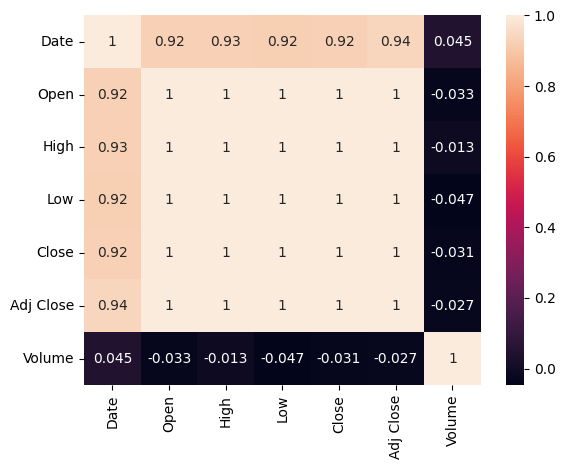

In [108]:
corr_matrix = data_stock.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

In [109]:
abs_corr = abs(corr_matrix['Close'])
high_corr = abs_corr[abs_corr > 0.2]
features = [col for col in data_stock.columns if col in high_corr]

#BUILD MODEL

In [110]:
X = data_stock[features].drop('Close', axis = 1)
Y = data_stock['Close']

In [111]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

##LINEAR REGRESSION

In [112]:
LRM = LinearRegression().fit(X_Train, Y_Train)
LRMPredTrain = LRM.predict(X_Train)
LRMPredTest = LRM.predict(X_Test)

###Output

In [113]:
LRM_Output = pd.DataFrame({'Actual': Y_Test, 'Predicted': LRMPredTest})
print(LRM_Output)

        Actual  Predicted
558   0.362782   0.367068
715   0.591165   0.579475
244   0.369361   0.365734
562   0.324248   0.325289
1181  0.830827   0.838446
...        ...        ...
819   0.600564   0.603743
88    0.234023   0.241411
1161  0.873120   0.874226
298   0.349624   0.344702
383   0.293233   0.291355

[246 rows x 2 columns]


In [114]:
print("Train Data Set")
print(f"R2 Score: {r2_score(Y_Train, LRMPredTrain)}")
print("Test Data Set")
print(f"R2 Score: {r2_score(Y_Test, LRMPredTest)}")

Train Data Set
R2 Score: 0.9992318895193413
Test Data Set
R2 Score: 0.9994592245495785


##RANDOM FOREST REGRESSOR

In [115]:
RFR = RandomForestRegressor().fit(X_Train, Y_Train)
RFRPredTrain = RFR.predict(X_Train)
RFRPredTest = RFR.predict(X_Test)

###Output

In [116]:
RFR_Output = pd.DataFrame({'Actual': Y_Test, 'Predicted': RFRPredTest})
print(RFR_Output)

        Actual  Predicted
558   0.362782   0.378177
715   0.591165   0.578994
244   0.369361   0.364539
562   0.324248   0.335818
1181  0.830827   0.832754
...        ...        ...
819   0.600564   0.608694
88    0.234023   0.232942
1161  0.873120   0.872979
298   0.349624   0.356945
383   0.293233   0.296570

[246 rows x 2 columns]


In [117]:
print("Train Data Set")
print(f"Accuracy: {r2_score(Y_Train, RFRPredTrain)}")
print("Test Data Set")
print(f"Accuracy: {r2_score(Y_Test, RFRPredTest)}")

Train Data Set
Accuracy: 0.9998841740727982
Test Data Set
Accuracy: 0.9994958857442193
